In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

(720, 1280, 3)


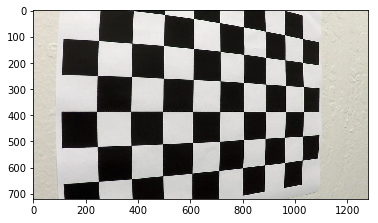

In [2]:
img = mpimg.imread('/home/arnav08/PycharmProjects/Project 4/camera_cal/calibration5.jpg')
image_shape = img.shape
print(image_shape)
plt.imshow(img)
plt.show()

In [3]:
nx = 9
ny = 6
import glob
objpoints = []
imgpoints = []

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

fnames = glob.glob("camera_cal/calibration*.jpg")

for fname in fnames:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        
# use the object and image points to caliberate the camera and compute the camera matrix and distortion coefficients
ret, mtx, dist,rvecs,tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_shape[:2],None,None)

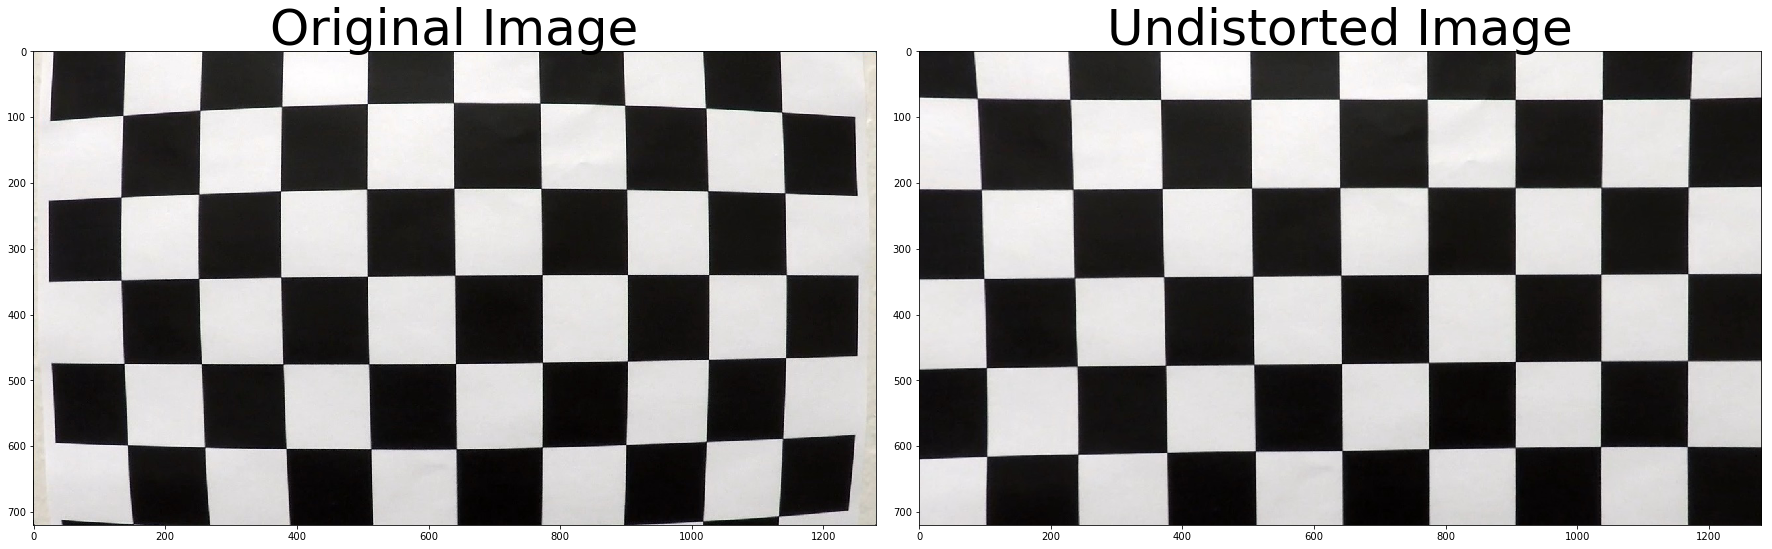

In [9]:

img = mpimg.imread('camera_cal/calibration1.jpg')

undistorted = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('/home/arnav08/PycharmProjects/Project 4/udistorted.jpg',undistorted)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


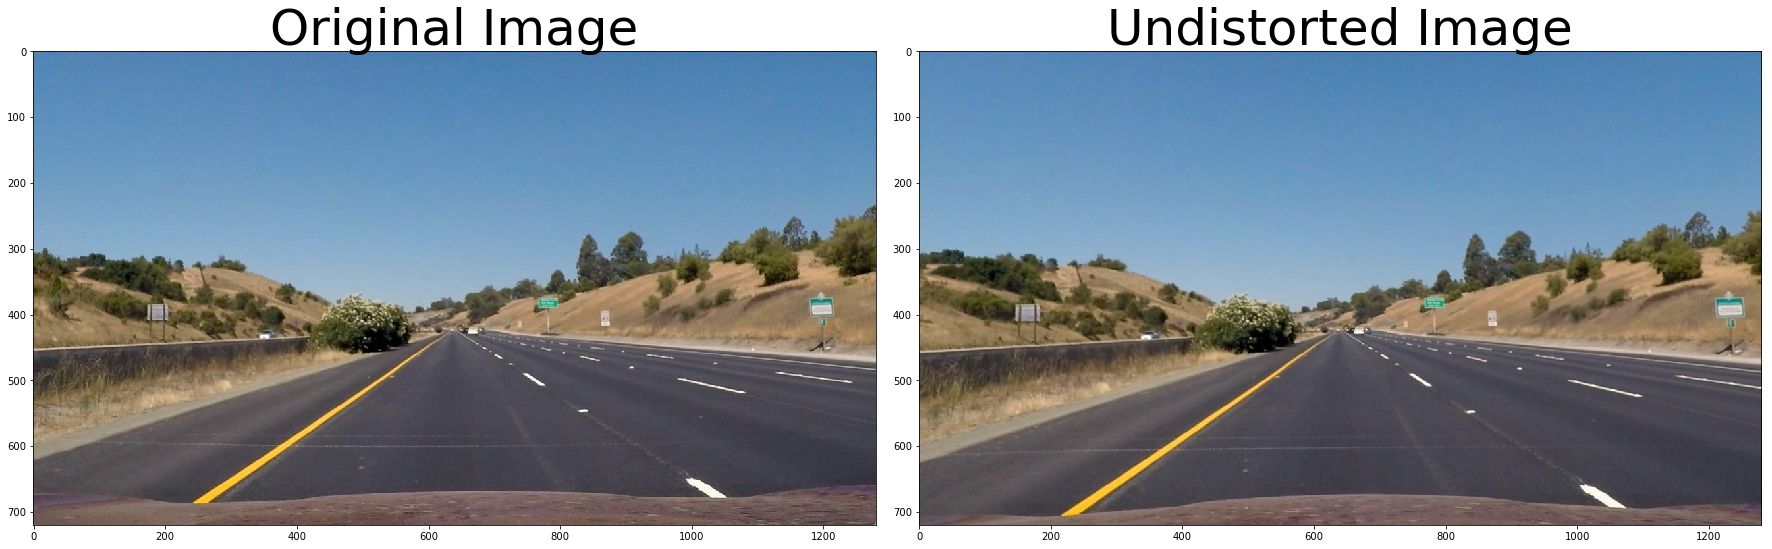

In [10]:

img = mpimg.imread('/home/arnav08/PycharmProjects/Project 4/straight_lines1.jpg')
undistorted1= cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('/home/arnav08/PycharmProjects/Project 4/udistorted1.jpg',undistorted1)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted1)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [11]:
# Sobel in the x direction

def abs_x_threshold(image, s_thresh=(100,255)):
    gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobel_x=cv2.Sobel(gray,cv2.CV_64F,1,0)
    abs_sobelx=np.absolute(sobel_x)
    scaled_sobel= np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    binary= np.zeros_like(scaled_sobel)
    binary[(scaled_sobel>s_thresh[0]) & (scaled_sobel<=s_thresh[1])]=1
    
    return binary

In [12]:
# Direction Sobel. Not used in the pipeline but inclucded
def dir_sobel(image, thresh=(0.7,1.3)):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    sobelx=cv2.Sobel(gray, cv2.CV_64F,1,0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    abs_sobel_x = np.absolute(sobelx)
    abs_sobel_y = np.absolute(sobely)
    dirsob = np.arctan2(abs_sobel_y, abs_sobel_x)
    abs_dir = np.absolute(dirsob)
    # 5) Create a binary mask where direction thresholds are met
    binary = np.zeros_like(abs_dir)
    binary[(abs_dir>=thresh[0]) & (abs_dir<=thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary

In [13]:
# S-channel 
def s_channel(image,smin=110, smax=255):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    s = hls[:, :, 2]
    binary=np.zeros_like(s)
    binary[(s>=smin) & (s<=smax)]=1 
    return binary

In [14]:
# V -channel 
def v_channel(image,vmin=45, vmax=255):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    v = hsv[:, :, 2]
    binary=np.zeros_like(v)
    binary[(v>=vmin) & (v<=vmax)]=1 
    return binary

In [15]:
#L-channel

def l_channel(image,lmin=80, lmax=255):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    l = hls[:, :, 1]
    binary=np.zeros_like(l)
    binary[(l>=lmin) & (l<=lmax)]==1
    return binary

In [16]:
# Red green channel
def red_green_channel(image):
    R = image[:, :, 0]
    G = image[:, :, 1]
    binary=np.zeros_like(R)
    binary[(R > 130) & (G > 130)]=1
    return binary

In [45]:
# Perspective Transform. Return a warped image 

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    #src = np.array([[91.4291, 718.468], [1021.46, 718.468], [711.63, 473.525], [515.621, 473.525]], np.float32)
    #dst = np.array([[271.63, 718.468], [908.028,718.468], [906.028, 0], [271.617, 0]], np.float32)
    #src = np.array([[254, 684], [1033, 684], [725, 474], [562, 474]], np.float32)
    #dst = np.array([[254,720], [1033,720], [1033, 0], [254, 0]], np.float32)
    #src = np.array([[220,720], [1110, 720], [722, 470], [570, 470]], np.float32)
    #dst = np.array([[320,720], [920, 720], [920, 1], [320, 1]], np.float32)
    #src = np.array([[211,719], [1079, 719], [708, 463], [576, 463]], np.float32)
    #dst = np.array([[360,720], [1035, 720], [1035, 0], [360, 0]], np.float32)
    #src = np.array([[278,677], [998,677], [739,486], [552,486]], np.float32)
    #dst = np.array([[359, img.shape[0]], [966,img.shape[0]], [966, 0], [359, 0]], np.float32)
    #src = np.array([[217,684], [1038,684], [714,453], [616,453]], np.float32)
    #dst = np.array([[359, img.shape[0]], [966,img.shape[0]], [966, 0], [359, 0]], np.float32)
    src = np.array([[220,720], [1110, 720], [722, 470], [570, 470]], np.float32)
    dst = np.array([[320,720], [920, 720], [920, 1], [320, 1]], np.float32)
    M = cv2.getPerspectiveTransform(src,dst)
    M_inv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped


In [41]:
# Function which returns a binary pespective transform image 

def process_image(image):
    undistorted = cv2.undistort(image,mtx, dist, None, mtx)
    sx_binary = abs_x_threshold(undistorted)
    dir_binary=dir_sobel(undistorted)
    s_binary=s_channel(undistorted)
    l_binary= l_channel(undistorted)
    v_binary=v_channel(undistorted)
    rg_binary= red_green_channel(undistorted)
    combined=np.zeros_like(dir_binary)
    #combined[((sx_binary==1) & (dir_binary==1))]=1
    combined[((sx_binary==1))]=1
    s_v=np.zeros_like(v_binary)
    s_v[((l_binary==1) | (v_binary==1))]=1
    lv_s=np.zeros_like(v_binary)
    lv_s[((s_v==1) & (s_binary==1))]=1
    combined_binary=np.zeros_like(rg_binary)
    combined_binary[((lv_s==1) | (combined==1))]=1
    return combined_binary
    

In [19]:
# Visuliazation of Perspective transform and thresholding 
def visualize(image):
    warped=warp(image)
    binary_warped=process_image(warped)
    return binary_warped

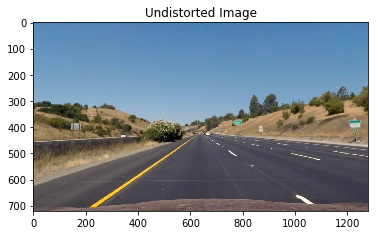

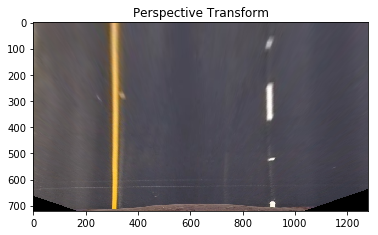

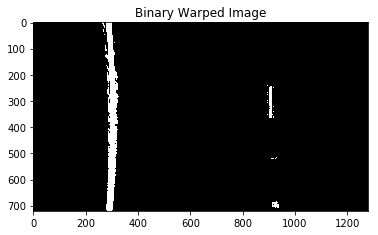

In [46]:
#Visualizastion of a test image

image=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/straight_lines1.jpg')
undistorted = cv2.undistort(image, mtx, dist, None, mtx)
plt.imshow(undistorted)
plt.title('Undistorted Image')
plt.show()
warped_image=warp(undistorted)
plt.imshow(warped_image)
plt.title('Perspective Transform')
plt.show()
binary_warped=visualize(image)
plt.imshow(binary_warped,cmap='gray')
plt.title('Binary Warped Image')
plt.show()

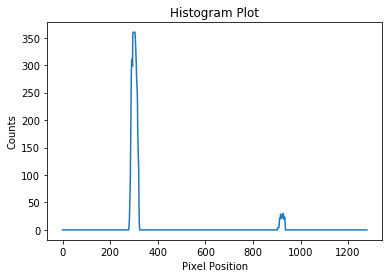

In [21]:
# Histogram Plot and Sliding Window Search

histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.ylabel('Counts')
plt.xlabel('Pixel Position')
plt.title('Histogram Plot')
plt.show()

midpoint=np.int(histogram.shape[0]/2)
leftx_base= np.argmax(histogram[:midpoint])
rightx_base=np.argmax(histogram[midpoint:])+midpoint
out_img=np.dstack((binary_warped,binary_warped,binary_warped))*255

non_zeros=binary_warped.nonzero()
non_zeros_y=non_zeros[0]
non_zeros_x=non_zeros[1]

leftx_current=leftx_base
rightx_current=rightx_base

left_lane_inds = []
right_lane_inds = []

min_pix=50

num_windows=20
window_height= np.int(binary_warped.shape[0]/num_windows)
window_half_width=100

for window in range(num_windows):
    y_min=binary_warped.shape[0]- (window+1)*window_height
    y_max=binary_warped.shape[0]- (window*window_height)
    xleft_min = leftx_current - window_half_width
    xleft_max=leftx_current + window_half_width
    xright_min=rightx_current - window_half_width
    xright_max=rightx_current + window_half_width
    
    cv2.rectangle(out_img,(xleft_max,y_max),(xleft_min,y_min),(0,255,0),2)
    cv2.rectangle(out_img,(xright_max,y_max),(xright_min,y_min),(0,255,0),2)
    
    good_left_inds=((non_zeros_y>=y_min) & (non_zeros_y<=y_max) & (non_zeros_x>=xleft_min) &
                    (non_zeros_x<=xleft_max)).nonzero()[0]
    good_right_inds=((non_zeros_y>=y_min) & (non_zeros_y<=y_max) & (non_zeros_x>=xright_min) &
                    (non_zeros_x<=xright_max)).nonzero()[0]
    
    
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    
    if len(good_left_inds)>min_pix:
        leftx_current=np.int(np.mean(non_zeros_x[good_left_inds]))
    if len(good_right_inds)>min_pix:
        rightx_current=np.int(np.mean(non_zeros_x[good_right_inds]))
        

left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)
leftx = non_zeros_x[left_lane_inds]
lefty = non_zeros_y[left_lane_inds]
rightx = non_zeros_x[right_lane_inds]
righty = non_zeros_y[right_lane_inds]

left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

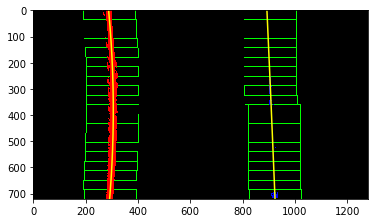

In [22]:
# Visualization of sliding window search 
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
out_img[non_zeros_y[left_lane_inds], non_zeros_x[left_lane_inds]] = [255, 0, 0]
out_img[non_zeros_y[right_lane_inds], non_zeros_x[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

In [23]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
left_fit[1]*nonzeroy + left_fit[2] + margin))) 

right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

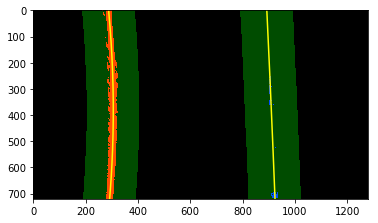

In [24]:
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

In [25]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
y_eval = np.max(ploty)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m


1344.45340575 m 27829.6911796 m


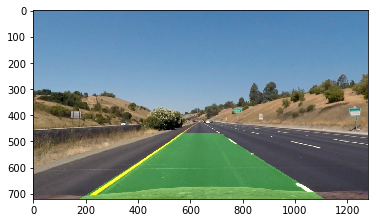

In [26]:
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
#src = np.array([[217,684], [1038,684], [714,453], [616,453]], np.float32)
#dst = np.array([[359, image.shape[0]], [966,image.shape[0]], [966, 0], [359, 0]], np.float32)
#src = np.array([[278,677], [998,677], [739,486], [552,486]], np.float32)
#dst = np.array([[359, image.shape[0]], [966,image.shape[0]], [966, 0], [359, 0]], np.float32)
#src = np.array([[91.4291, 718.468], [1021.46, 718.468], [711.63, 473.525], [515.621, 473.525]], np.float32)
#dst = np.array([[271.63, 718.468], [908.028,718.468], [906.028, 0], [271.617, 0]], np.float32)
#src = np.array([[254, 684], [1033, 684], [725, 474], [562, 474]], np.float32)
#dst = np.array([[254,720], [1033,720], [1033, 0], [254, 0]], np.float32)
#src = np.array([[220,720], [1110, 720], [722, 470], [570, 470]], np.float32)
#src = np.array([[211,719], [1079, 719], [708, 463], [576, 463]], np.float32)
#dst = np.array([[360,720], [1035, 720], [1035, 0], [360, 0]], np.float32)
src = np.array([[220,720], [1110, 720], [722, 470], [570, 470]], np.float32)
dst = np.array([[320,720], [920, 720], [920, 1], [320, 1]], np.float32)
M_inv = cv2.getPerspectiveTransform(dst,src)
# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, M_inv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
undistorted = cv2.undistort(image,mtx, dist, None, mtx)
result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
plt.imshow(result)
plt.show()

In [27]:
# Perspective Transform. Return a warped image 

def warp(img):
    img_size = (img.shape[1], img.shape[0])
    src = np.array([[91, 718], [1021, 718], [711, 473], [515, 473]], np.float32)
    dst = np.array([[271, 718], [908,718], [908, 0], [271,0]], np.float32)
    #src = np.array([[278,677], [998,677], [739,486], [552,486]], np.float32)
    #dst = np.array([[359, img.shape[0]], [966,img.shape[0]], [966, 0], [359, 0]], np.float32)
    #src = np.array([[217,684], [1038,684], [714,453], [616,453]], np.float32)
    #dst = np.array([[359, img.shape[0]], [966,img.shape[0]], [966, 0], [359, 0]], np.float32)
    M = cv2.getPerspectiveTransform(src,dst)
    M_inv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return warped

In [28]:
def sliding_window(image):
    #binary_warped=visualize(image)
    histogram = np.sum(image[image.shape[0]//2:,:], axis=0)
    midpoint=np.int(histogram.shape[0]/2)
    leftx_base= np.argmax(histogram[:midpoint])
    rightx_base=np.argmax(histogram[midpoint:])+midpoint
    non_zeros=image.nonzero()
    non_zeros_y=non_zeros[0]
    non_zeros_x=non_zeros[1]

    leftx_current=leftx_base
    rightx_current=rightx_base

    left_lane_inds = []
    right_lane_inds = []

    min_pix=50
    out_img=np.dstack((image,image,image))*255

    num_windows=10
    window_height= np.int(image.shape[0]/num_windows)
    window_half_width=100

    for window in range(num_windows):
        y_min=image.shape[0]- (window+1)*window_height
        y_max=image.shape[0]- (window*window_height)
        xleft_min = leftx_current - window_half_width
        xleft_max=leftx_current + window_half_width
        xright_min=rightx_current - window_half_width
        xright_max=rightx_current + window_half_width
    
        cv2.rectangle(out_img,(xleft_max,y_max),(xleft_min,y_min),(0,255,0),2)
        cv2.rectangle(out_img,(xright_max,y_max),(xright_min,y_min),(0,255,0),2)
    
        good_left_inds=((non_zeros_y>=y_min) & (non_zeros_y<=y_max) & (non_zeros_x>=xleft_min) &
                    (non_zeros_x<=xleft_max)).nonzero()[0]
        good_right_inds=((non_zeros_y>=y_min) & (non_zeros_y<=y_max) & (non_zeros_x>=xright_min) &
                    (non_zeros_x<=xright_max)).nonzero()[0]
    
    
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
    
        if len(good_left_inds)>min_pix:
            leftx_current=np.int(np.mean(non_zeros_x[good_left_inds]))
        if len(good_right_inds)>min_pix:
            rightx_current=np.int(np.mean(non_zeros_x[good_right_inds]))
        

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    leftx = non_zeros_x[left_lane_inds]
    lefty = non_zeros_y[left_lane_inds]
    rightx = non_zeros_x[right_lane_inds]
    righty = non_zeros_y[right_lane_inds]
    
    left_line, right_line= line_polyfit(image,leftx, lefty, rightx, righty)
    return left_line, right_line


In [29]:
def line_polyfit(image,leftx, lefty,rightx, righty):
    if(leftx.size==0 | lefty.size==0):
        return None,None
    if(rightx.size==0 | righty.size==0):
        return None, None 
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0])
    # Generate x and y values for plotting
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    return left_fitx, right_fitx

In [30]:
def sanity_check(left_fit, right_fit, minSlope, maxSlope):
    # Performs a sanity check on the lanes
    # Check 1: check if left and right fits exists
    # Check 2: Calculates the tangent between left and right in two points, and check if it is in a reasonable threshold
    if ((left_fit is None) | (right_fit is None)):
        status = False
        d0 = 0
        d1 = 0
        # Previous fitlines routine returns empty list to them if not finds
    else:
        # Difference of slope
        L_0 = 2 * left_fit[0] * 360 + left_fit[1]
        R_0 = 2 * right_fit[0] * 360 + right_fit[1]
        d0 = np.abs(L_0 - R_0)

        L_1 = 2 * left_fit[0] * 720 + left_fit[1]
        R_1 = 2 * right_fit[0] * 720 + right_fit[1]
        d1 = np.abs(L_1 - R_1)

        if d0 >= minSlope and d0 <= maxSlope and d1 >= minSlope and d1 <= maxSlope:
            status = True
        else:
            status = False

    return status

In [31]:
def lane_storage(old_line, new_line):
    frame=20
    if new_line is None:
        # No line was detected
        
        if len(old_line) == 0:
            
            return old_line, None
        else:
            return old_line, old_line[-1]
    else:
        if len(old_line) <frame:
            old_line.append(new_line)
            return old_line, new_line
        else:
            old_line[0:frame-1] = old_line[1:]
            old_line[frame-1] = new_line
            new_line = np.zeros_like(new_line)
            for i in range(frame):
                new_line += old_line[i]
            new_line /= frame
            return old_line, new_line

In [33]:
def average_radius(image,left_line, right_line):
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    ploty=np.linspace(0, image.shape[0]-1, image.shape[0])
    y_eval=np.max(ploty)
    left_fit_world = np.polyfit(ploty*ym_per_pix, left_line*xm_per_pix, 2)
    right_fit_world = np.polyfit(ploty*ym_per_pix, right_line*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_world[0]*y_eval*ym_per_pix + right_fit_world[1])**2)**1.5) / np.absolute(2*left_fit_world[0])
    right_curverad = ((1 + (2*right_fit_world[0]*y_eval*ym_per_pix + right_fit_world[1])**2)**1.5) / np.absolute(2*right_fit_world[0])
    average=(left_curverad+right_curverad)/2
    lane_center = (left_line+right_line)/2
    offset= abs(image.shape[1]/2 - lane_center)
    offset_world=  offset*xm_per_pix
    return average
    


In [38]:
# Final Pipleline 
def lane_pipeline(image):
    global running_mean_difference
    global left_fit
    global right_fit
    global old_line_left
    global old_line_right
    binary_warped=visualize(image)
    #histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    #plt.plot(histogram)
    #plt.show()

    #midpoint=np.int(histogram.shape[0]/2)
    #leftx_base= np.argmax(histogram[:midpoint])
    #rightx_base=np.argmax(histogram[midpoint:])+midpoint

    out_img=np.dstack((binary_warped,binary_warped,binary_warped))*255
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    ploty=np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    
    if (left_fit is None) | (right_fit is None):
        window_search=True
        left_line, right_line= sliding_window(binary_warped)
    
    else:
        window_search= False
        margin = 100
        left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
        left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
        left_fit[1]*nonzeroy + left_fit[2] + margin))) 

        right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
        right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
        right_fit[1]*nonzeroy + right_fit[2] + margin)))  
        
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]

        
        left_line,right__line=line_polyfit(binary_warped,leftx, lefty, rightx, righty)
    if((left_line is None)| (right_line is None)):
        if not window_search:
            left_line , right_line = sliding_window(binary_warped)
    bad_lines=False
    #print('Bad False')
    
    if((left_line is None) | (right_line is None)):
        bad_lines=True
    else:
        difference=np.mean(right_line-left_line)
        if running_mean_difference == 0:
            running_mean_difference= difference
        if (difference < 0.7*running_mean_difference or difference > 1.3*running_mean_difference):
        #if sanity_check(left_line, right_line)==False:
            bad_lines=True
            if not window_search:
                left_line , right_line = sliding_window(binary_warped)
                if((left_line is None) | (right_line is None)):
                    bad_lines=True
                else:
                    difference = np.mean(right_line - left_line)
                    if (difference < 0.7*running_mean_difference or mean_difference > 1.3*running_mean_difference):
                    #if sanity_check(left_fit, right_fit,0,0.1)==False:
                        bad_lines=True
                    else:
                        bad_lines=False
        else:
            bad_lines=False
        #print('Bad False2')
    
    if bad_lines==True:
        #print('Bad_lines')
        left_fit=None
        right_fit=None
        if (len(old_line_left)==0 & len(old_line_right)==0):
            #print('no line')
            return image
        else:
            left_line=old_line_left[-1]
            right_line=old_line_right[-1]
    else:
        old_line_left, left_line= lane_storage(old_line_left, left_line)
        old_line_right,right_line=lane_storage( old_line_right,right_line)
        difference = np.mean(right_line - left_line)
        running_mean_difference = 0.9*running_mean_difference + 0.1*difference
    
    average=average_radius(binary_warped,left_line, right_line)
    #lane_center = ((left_line+right_line))/2
    #offset= abs((image.shape[1]/2 - lane_center))
    xm_per_pix = 3.7/700
    #offset_world=  (offset)*xm_per_pix
    curvature= "Radius of curvature: %.2f m" % average
    lane_center = (right_line[719] + left_line[719])/2
    center_offset= abs(image.shape[1]/2 - lane_center)
    center_offset_world = xm_per_pix*center_offset
    offset_string = "Center offset: %.2f m" % center_offset_world
    #offset_string = "Center offset: %.2f m" % offset_world
    
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_line, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_line, ploty])))])
    pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
#src = np.array([[217,684], [1038,684], [714,453], [616,453]], np.float32)
#dst = np.array([[359, image.shape[0]], [966,image.shape[0]], [966, 0], [359, 0]], np.float32)
    #src = np.array([[278,677], [998,677], [739,486], [552,486]], np.float32)
    #dst = np.array([[359, image.shape[0]], [966,image.shape[0]], [966, 0], [359, 0]], np.float32)
    src = np.array([[91, 718], [1021, 718], [711, 473], [515, 473]], np.float32)
    dst = np.array([[271, 718], [908,718], [908, 0], [271,0]], np.float32)
    M_inv = cv2.getPerspectiveTransform(dst,src)
# Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, M_inv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
    undistorted_image = cv2.undistort(image,mtx, dist, None, mtx)
    result = cv2.addWeighted(undistorted_image, 1, newwarp, 0.3, 0)
    cv2.putText(result,curvature , (100, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    cv2.putText(result, offset_string, (100, 150), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), thickness=2)
    
    return result
    

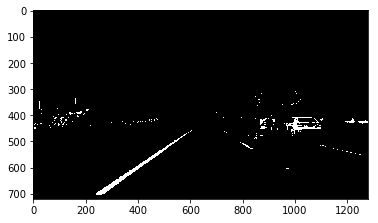

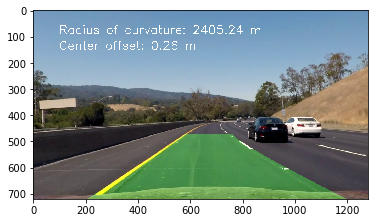

In [39]:
#Visualizastion of a test image
image=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/Frames/Original/frame894.jpg')
#plt.imshow(image)
#plt.show()
left_fit = None
right_fit = None
old_line_left = []
old_line_right = []
running_mean_difference=0
result=lane_pipeline(image)
if result is None:
    print('Hello')

binary_warped=process_image(image)
#print(binary_warped[1:,:])
plt.imshow(binary_warped,cmap='gray')
plt.show()
plt.imshow(result)
plt.show()

In [40]:

# Reinitialize some global variables.
left_fit = None
right_fit = None
old_line_left = []
old_line_right = []
running_mean_difference=0
from moviepy.editor import VideoFileClip
output = '/home/arnav08/PycharmProjects/Project 4/project_video24.mp4'
clip1 = VideoFileClip("/home/arnav08/PycharmProjects/Project 4/project_video.mp4")
white_clip = clip1.fl_image(lane_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video /home/arnav08/PycharmProjects/Project 4/project_video24.mp4
[MoviePy] Writing video /home/arnav08/PycharmProjects/Project 4/project_video24.mp4


100%|█████████▉| 1260/1261 [04:12<00:00,  5.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /home/arnav08/PycharmProjects/Project 4/project_video24.mp4 

CPU times: user 19min 24s, sys: 10.8 s, total: 19min 35s
Wall time: 4min 13s


In [ ]:

# Reinitialize some global variables.
left_fit = None
right_fit = None
old_line_left = []
old_line_right = []
running_mean_difference_between_lines=0
from moviepy.editor import VideoFileClip
output = '/home/arnav08/PycharmProjects/Project 4/project_video13.mp4'
clip1 = VideoFileClip("/home/arnav08/PycharmProjects/Project 4/challenge_video.mp4")
white_clip = clip1.fl_image(lane_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(output, audio=False)

In [42]:

def channel_explore(image,smin=90, smax=255,hmin=170, hmax=255,lmin=130, lmax=255, vmin=100, vmax=255):
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hsv=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    h = hls[:, :, 0]
    l = hls[:, :, 1]
    s = hls[:, :, 2]
    v=hsv[:,:,2]
    s_binary=np.zeros_like(s)
    h_binary = np.zeros_like(h)
    l_binary = np.zeros_like(l)
    v_binary=np.zeros_like(v)
    s_binary[(s>smin) & (s<=smax)] = 1
    h_binary[(h>hmin) & (h<=hmax)] = 1
    l_binary[(l>lmin) & (l<=lmax)] = 1
    v_binary[(v>vmin) & (v<=vmax)] = 1
    R = image[:, :, 0]
    G = image[:, :, 1]
    r_g_condition = np.zeros_like(R)
    r_g_condition [(R > 140) & (G > 140)]=1
    combined = np.zeros_like(s_binary)
    # combined[((sxbinary==1) & (dir_binary==1)) | (s_binary==1)]=1
    combined[(l_binary == 1) | (s_binary == 1)] = 1
    return h_binary , l_binary , s_binary,r_g_condition, v_binary

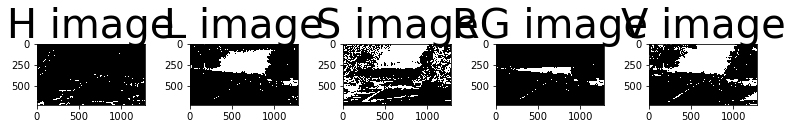

In [43]:
img=mpimg.imread('/home/arnav08/PycharmProjects/Project 4/Frames/Original/frame1039.jpg')
h, l ,s, rg ,v =channel_explore(img)

#warped_im=warp(im)
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(10, 9))
f.tight_layout()

ax1.imshow(h,cmap='gray')
ax1.set_title('H image', fontsize=40)
ax2.imshow(l,cmap='gray')
ax2.set_title('L image', fontsize=40)
ax3.imshow(s,cmap='gray')
ax3.set_title('S image', fontsize=40)
ax4.imshow(rg,cmap='gray')
ax4.set_title('RG image', fontsize=40)
ax5.imshow(v,cmap='gray')
ax5.set_title('V image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [ ]:
#References:

#https://discussions.udacity.com/c/nd013-computer-vision/project-advanced-lane-finding
# https://github.com/udacity/CarND-Advanced-Lane-Lines
